In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv("ab_data.csv")
data['date'] = pd.to_datetime(data['date'])
data = data[(data['days_since_account_creation'] >= 0) & 
                     (data['num_downloads'] >= 0) & 
                     (data['num_searches'] >= 0)]
data

,user_id,group,country,career,subscription,date,hour,click_yes,click_no,days_since_account_creation,num_downloads,num_searches
0,1,popup_1,England,KS1,paid,2020-07-10,8,0,0,1166,1,32.0
1,2,popup_1,England,KS1,paid,2020-07-07,10,0,0,5,227,21.0
2,3,popup_1,Scotland,NaN,paid,2020-07-05,2,0,1,80,0,0.0
3,4,popup_2,NaN,NaN,paid,2020-07-03,15,0,0,1176,0,0.0
4,5,popup_2,England,KS1,paid,2020-07-03,15,0,0,743,126,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8072,8073,popup_1,England,KS1,paid,2020-07-05,7,0,0,0,176,363.0
8073,8074,popup_2,England,KS1,paid,2020-07-03,15,0,0,3237,292,24.0
8074,8075,popup_2,England,KS1,paid,2020-07-04,9,0,0,3893,0,9.0
8075,8076,popup_1,Wales,NaN,paid,2020-07-05,15,0,0,3249,0,0.0


In [8]:
total_clicks = data[(data['click_yes'] == 1) | (data['click_no'] == 1)].shape[0]

print("Total number of users who clicked: ", total_clicks)

Total number of users who clicked:  1184


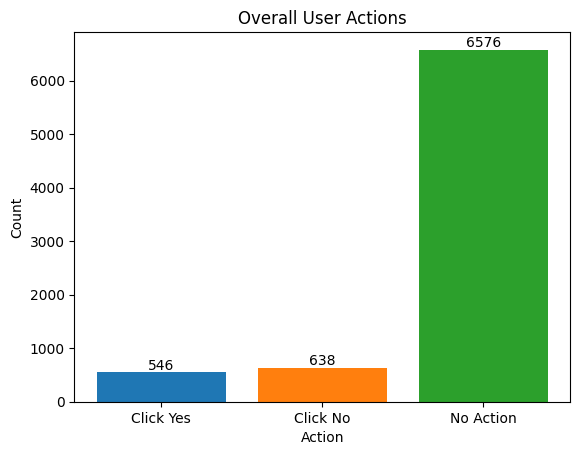

In [11]:
counts = {
    'Click Yes': (data['click_yes'] > 0).sum(),
    'Click No': (data['click_no'] > 0).sum(),
    'No Action': ((data['click_yes'] == 0) & (data['click_no'] == 0)).sum()
}

# Plotting
colors = plt.cm.tab10(range(len(counts)))
bars = plt.bar(counts.keys(), counts.values(), color=colors)
plt.xlabel('Action')
plt.ylabel('Count')
plt.title('Overall User Actions')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.show()

In [27]:
# Grouping the data by demographic factors
grouped_data_country = data.groupby('country')
grouped_data_career = data.groupby('career')
grouped_data_subscription = data.groupby('subscription')

# Calculate counts for each group
counts_country = grouped_data_country.apply(lambda x: pd.Series({
    'click yes': (x['click_yes'] > 0).sum(),
    'click no': (x['click_no'] > 0).sum(),
    'no action': ((x['click_yes'] == 0) & (x['click_no'] == 0)).sum()
})).reset_index()

counts_career = grouped_data_career.apply(lambda x: pd.Series({
    'click yes': (x['click_yes'] > 0).sum(),
    'click no': (x['click_no'] > 0).sum(),
    'no action': ((x['click_yes'] == 0) & (x['click_no'] == 0)).sum()
})).reset_index()

counts_subscription = grouped_data_subscription.apply(lambda x: pd.Series({
    'click yes': (x['click_yes'] > 0).sum(),
    'click no': (x['click_no'] > 0).sum(),
    'no action': ((x['click_yes'] == 0) & (x['click_no'] == 0)).sum()
})).reset_index()

# Plotting
def plot_counts(counts, demographic_factor):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    bar_width = 0.2
    index = range(len(counts))

    for i, action in enumerate(['click yes', 'click no', 'no action']):
        ax.bar([x + i * bar_width for x in index], counts[action], bar_width, label=action)

    ax.set_xlabel(demographic_factor.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'User Actions by {demographic_factor.capitalize()}')
    ax.set_xticks([i + bar_width for i in index])
    ax.set_xticklabels(counts[demographic_factor], rotation=45, ha='right')
    ax.legend()


/var/folders/96/ntd6ngxn5klgfg7ylpwj8n_h0000gn/T/ipykernel_27838/326427800.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts_country = grouped_data_country.apply(lambda x: pd.Series({
/var/folders/96/ntd6ngxn5klgfg7ylpwj8n_h0000gn/T/ipykernel_27838/326427800.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts_career = grouped_data_career.apply(lambda x: pd.Series({
/var/folders/96/ntd6ngxn5

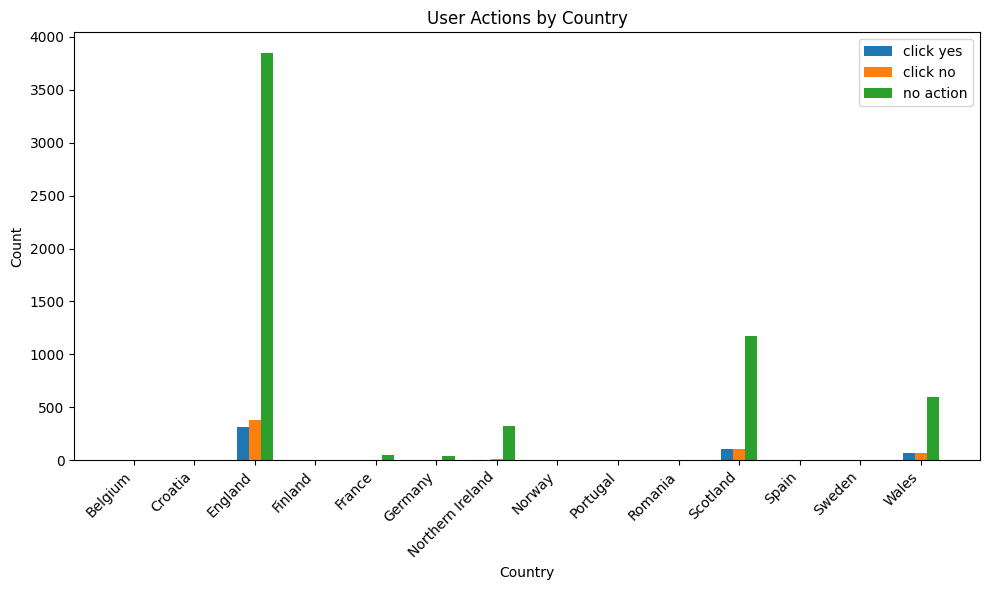

In [28]:
plot_counts(counts_country, 'country')
plt.tight_layout()
plt.show()



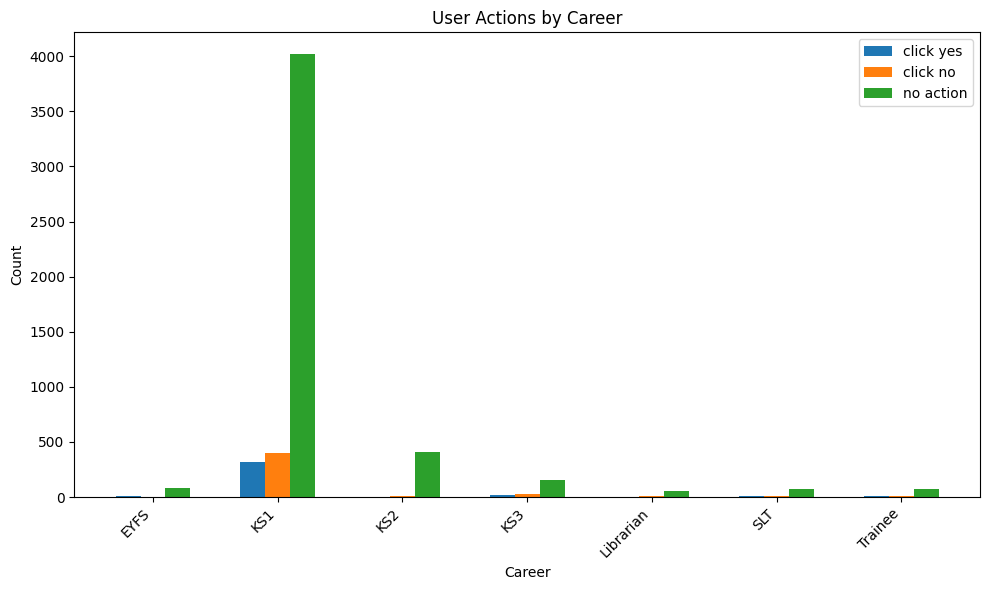

In [29]:
# Plot for career
plot_counts(counts_career, 'career')
plt.tight_layout()
plt.show()



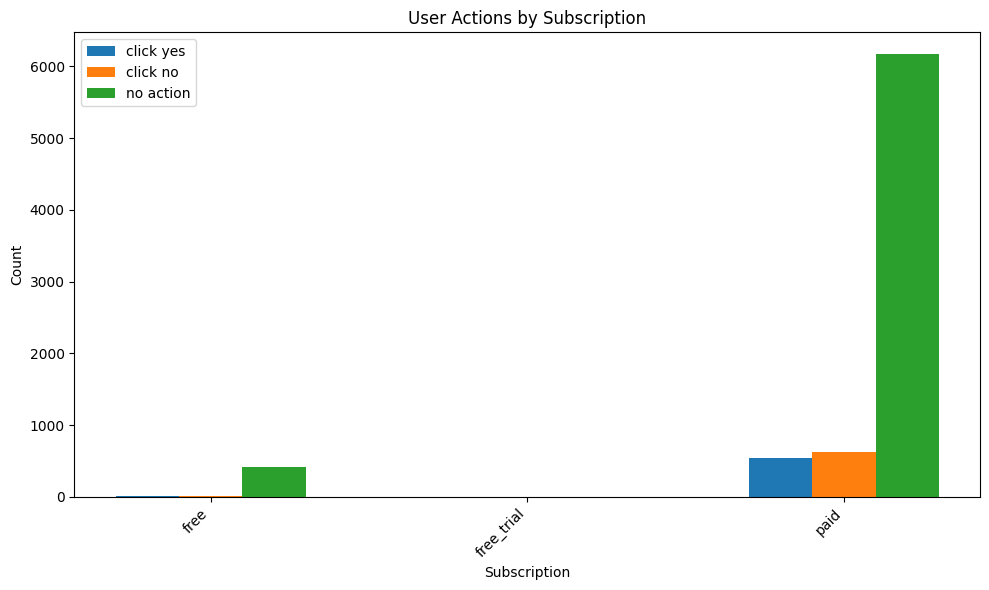

In [30]:

# Plot for subscription
plot_counts(counts_subscription, 'subscription')
plt.tight_layout()
plt.show()

In [64]:
data = data.rename(columns={'click_yes': 'click yes', 'click_no': 'click no'})


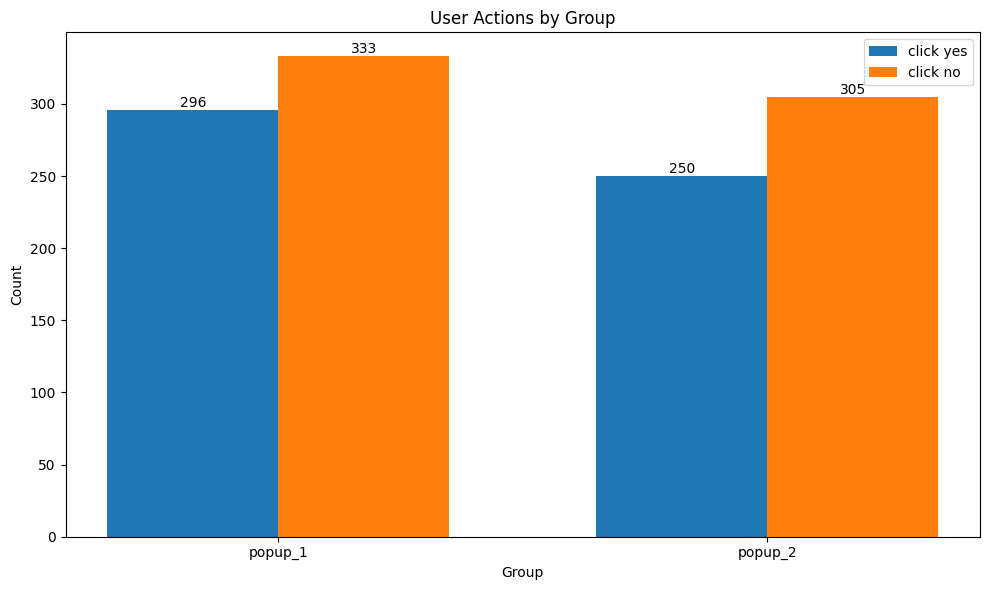

In [66]:
# Calculate sums of click counts for each group
counts = data.groupby('group')[['click yes', 'click no']].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(counts))

for i, action in enumerate(['click yes', 'click no']):
    ax.bar(index + i * bar_width, counts[action], bar_width, label=action)

ax.set_xlabel('Group')
ax.set_ylabel('Count')
ax.set_title('User Actions by Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(counts['group'])
ax.legend()

# Add count labels on top of each bar
for i, action in enumerate(['click yes', 'click no']):
    for j, y in enumerate(counts[action]):
        ax.text(index[j] + i * bar_width, y + 0.05, str(int(y)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

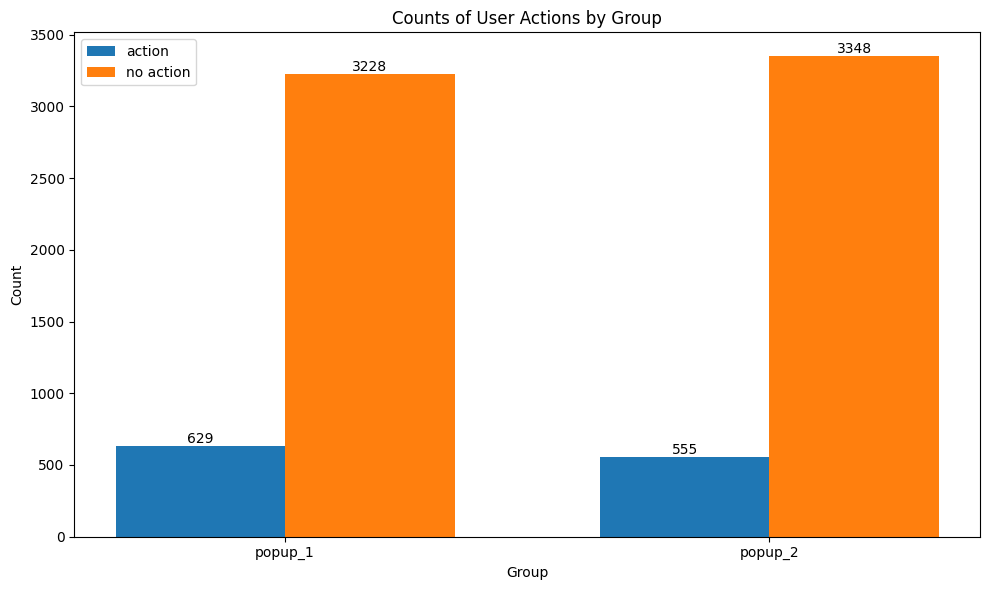

In [73]:
# Create a new column 'action' based on conditions
data['action'] = (data['click yes'] > 0) | (data['click no'] > 0)
data['action'] = data['action'].replace({True: 'action', False: 'no action'})

# Calculate counts for each group and action
counts = data.groupby(['group', 'action']).size().unstack(fill_value=0).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(counts))

for i, action in enumerate(['action', 'no action']):
    ax.bar(index + i * bar_width, counts[action], bar_width, label=action)

ax.set_xlabel('Group')
ax.set_ylabel('Count')
ax.set_title('User Actions by Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(counts['group'])
ax.legend()

# Add count labels on top of each bar
for i, action in enumerate(['action', 'no action']):
    for j, y in enumerate(counts[action]):
        ax.text(index[j] + i * bar_width, y + 0.05, str(int(y)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [1]:
data

NameError: name 'data' is not defined

In [57]:
counts

,group,popup_1_click_yes,popup_1_click_no,popup_2_click_yes,popup_2_click_no
0,popup_1,296,333,0,0
1,popup_2,0,0,250,305
